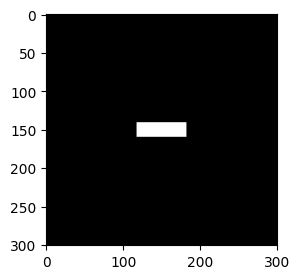

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, fftshift





######################## Définition des fonctions ##############################
'''def porte_2d(n, m, lx, ly):
    """
    Génère une fenêtre rectangulaire de dimensions lx x ly au centre d'une matrice de dimensions n x m.
    """
    M = np.zeros((n, m))
    cx, cy = n // 2, m // 2
    M[cx - lx//2:cx + lx//2, cy - ly//2:cy + ly//2] = 1
    return M'''

def porte_2d(n, m, lx, ly):
    """
    Génère une fenêtre rectangulaire de dimensions lx x ly au centre d'une matrice de dimensions n x m.
    
    Parameters:
    n (int): Nombre de lignes de la matrice.
    m (int): Nombre de colonnes de la matrice.
    lx (int): Largeur de la fenêtre rectangulaire.
    ly (int): Hauteur de la fenêtre rectangulaire.
    
    Returns:
    numpy array: Matrice avec la fenêtre rectangulaire.
    """
    x = np.arange(-n//2, n//2 + 1)
    y = np.arange(-m//2, m//2 + 1)
    p1 = np.abs(x) < 0.5 * lx
    p2 = np.abs(y) < 0.5 * ly
    P = np.outer(p2, p1).astype(float)
    return P

# Exemple d'utilisation de la fonction porte_2d
n, m = 300, 300
lx, ly = 65, 20
P = porte_2d(n, m, lx, ly)
plt.figure(1,figsize=(3,3))
plt.imshow(P, cmap='gray')


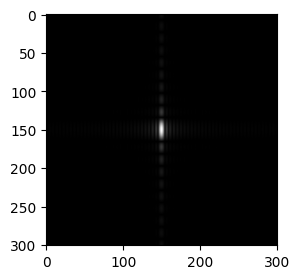

In [2]:
F = fftshift(fft2(P))
plt.figure(2,figsize=(3,3))
plt.imshow(np.abs(F), cmap='gray')
plt.show()

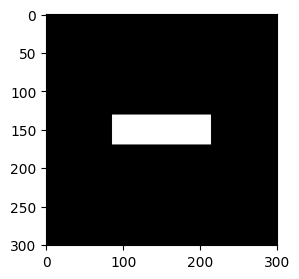

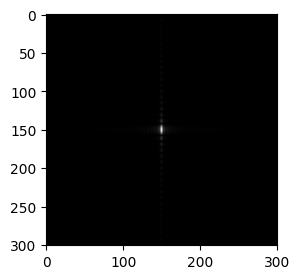

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, fftshift





######################## Définition des fonctions ##############################
'''def porte_2d(n, m, lx, ly):
    """
    Génère une fenêtre rectangulaire de dimensions lx x ly au centre d'une matrice de dimensions n x m.
    """
    M = np.zeros((n, m))
    cx, cy = n // 2, m // 2
    M[cx - lx//2:cx + lx//2, cy - ly//2:cy + ly//2] = 1
    return M'''

def porte_2d(n, m, lx, ly):
    """
    Génère une fenêtre rectangulaire de dimensions lx x ly au centre d'une matrice de dimensions n x m.
    
    Parameters:
    n (int): Nombre de lignes de la matrice.
    m (int): Nombre de colonnes de la matrice.
    lx (int): Largeur de la fenêtre rectangulaire.
    ly (int): Hauteur de la fenêtre rectangulaire.
    
    Returns:
    numpy array: Matrice avec la fenêtre rectangulaire.
    """
    x = np.arange(-n//2, n//2 + 1)
    y = np.arange(-m//2, m//2 + 1)
    p1 = np.abs(x) < 0.5 * lx
    p2 = np.abs(y) < 0.5 * ly
    P = np.outer(p2, p1).astype(float)
    return P

# Exemple d'utilisation de la fonction porte_2d
n, m = 300, 300
lx, ly = 130, 40
P = porte_2d(n, m, lx, ly)
plt.figure(1,figsize=(3,3))
plt.imshow(P, cmap='gray')
F = fftshift(fft2(P))
plt.figure(2,figsize=(3,3))
plt.imshow(np.abs(F), cmap='gray')
plt.show()

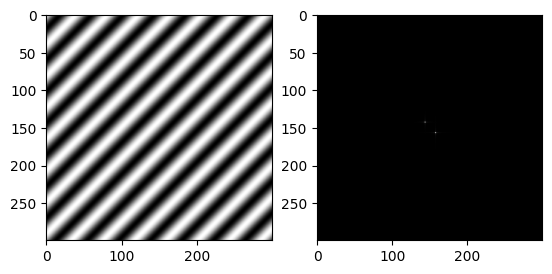

In [4]:

plt.figure(3)
n, m = 300, 300
x, y = np.meshgrid(np.arange(1, n + 1), np.arange(1, m + 1))
M4 = np.cos(0.15 * x + 0.15 * y)
plt.subplot(1, 2, 1)
plt.imshow(M4, cmap='gray')
F4 = fftshift(fft2(M4))
plt.subplot(1, 2, 2)
plt.imshow(np.abs(F4), cmap='gray')
plt.show()


(np.float64(-0.5), np.float64(509.5), np.float64(509.5), np.float64(-0.5))

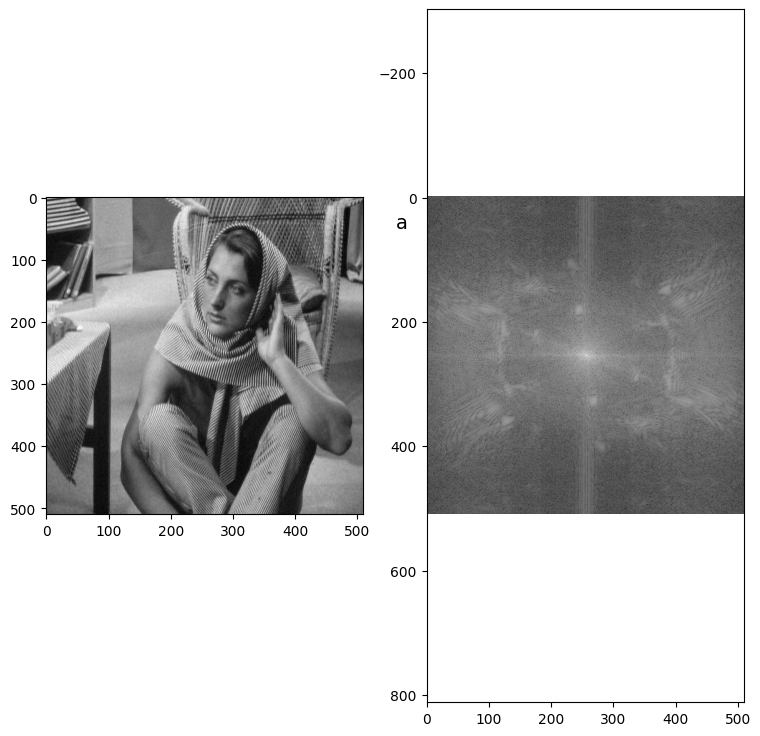

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift

def disque(n, m, r):
    D = np.zeros((m, n))
    for i in range(-m//2, m//2):
        for j in range(-n//2, n//2):
            if i**2 + j**2 <= r**2:
                D[i + m//2, j + n//2] = 1
    return D

# lecture
A = plt.imread('barbara.jpg')
a, b = A.shape

# affichage de l'image originale
plt.figure(1,figsize=(9,9))
plt.subplot(1, 2, 1)
plt.imshow(A, cmap='gray')
F2 = fftshift(fft2(A))
plt.subplot(1, 2, 2)
module = np.log10( np.abs(F2))
plt.imshow(module, cmap='gray')

plt.text(-50, 50, 'a', fontsize=14)
plt.axis('equal')

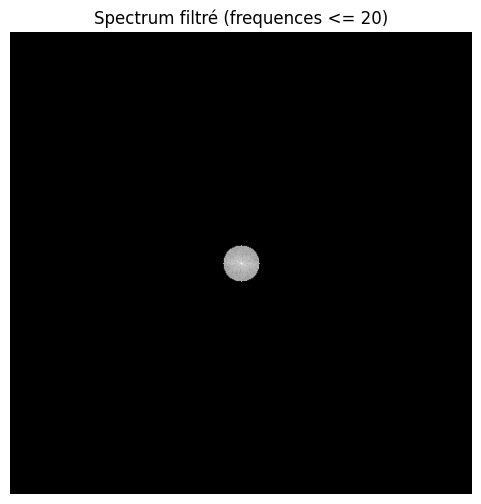

In [6]:
R = 20

D = disque(b, a, R)
F2_filtre = F2 * D
# Affichage du spectre filtré
plt.figure(3, figsize=(6, 6))
plt.imshow(np.log10(1 + np.abs(F2_filtre)), cmap='gray')
plt.title(f"Spectrum filtré (frequences <= {R})")
plt.axis('off')
plt.show()

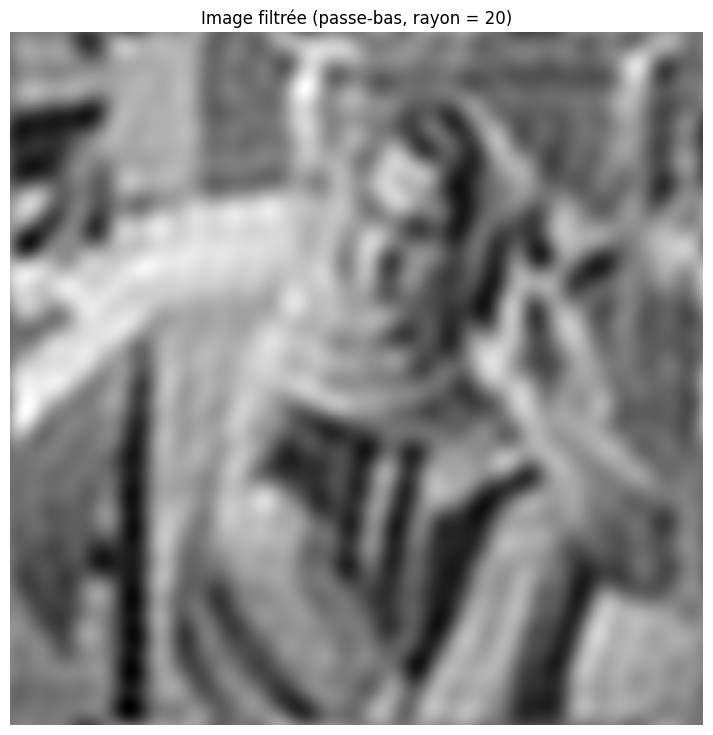

In [7]:
# Retour dans le domaine spatial (image filtrée)
A_filtre = np.real(ifft2(fftshift(F2_filtre)))

# Affichage de l'image filtrée
plt.figure(4, figsize=(9, 9))
plt.imshow(A_filtre, cmap='gray')
plt.title(f"Image filtrée (passe-bas, rayon = {R})")
plt.axis('off')
plt.show()

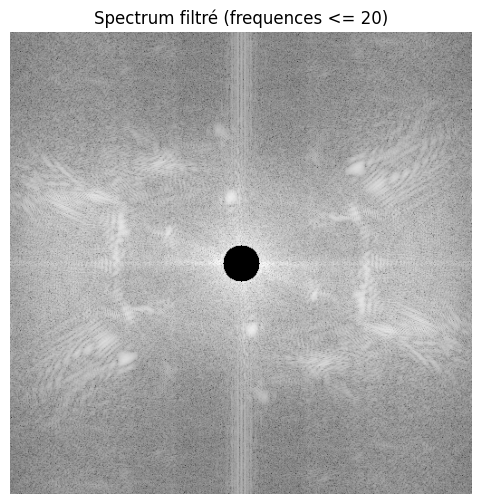

In [8]:
D_hp = 1 - D  # masque passe-haut : 1 sur les fréquences hautes, 0 au centre
F2_hp = F2 * D_hp
plt.figure(3, figsize=(6, 6))
plt.imshow(np.log10(1 + np.abs(F2_hp)), cmap='gray')
plt.title(f"Spectrum filtré (frequences <= {R})")
plt.axis('off')
plt.show()


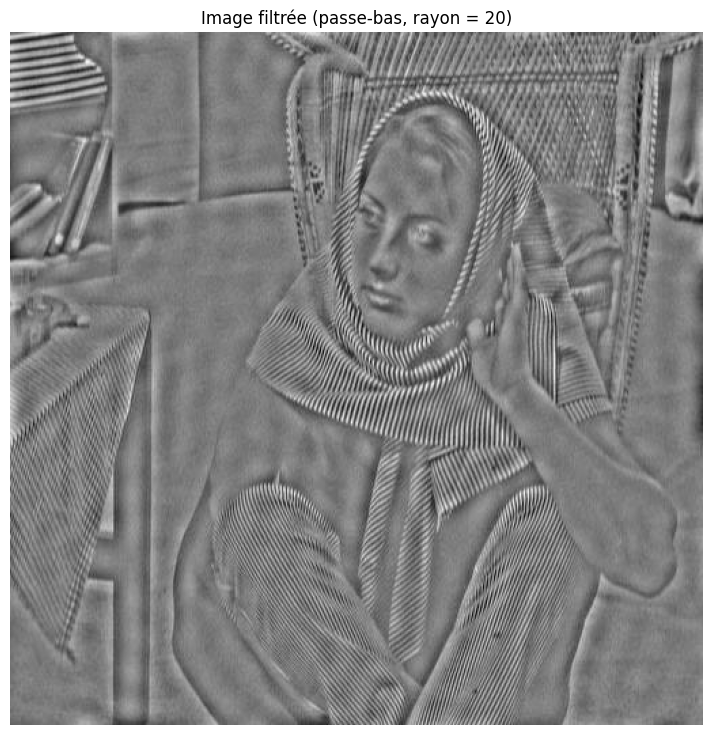

In [9]:
# Retour dans le domaine spatial (image filtrée)
A_filtrre = np.real(ifft2(fftshift(F2_hp)))

# Affichage de l'image filtrée
plt.figure(4, figsize=(9, 9))
plt.imshow(A_filtrre, cmap='gray')
plt.title(f"Image filtrée (passe-bas, rayon = {R})")
plt.axis('off')
plt.show()